# Session 3 - Assessing & Testing Solutions

# 2

In [23]:
#Import the required libraries
import pandas as pd
import os.path as osp

#Build the path for the data file
data_path = osp.join(
    osp.curdir,'Data','MMA 860 Assessing and Testing Data File v1.0.xlsx')

#Use the read_excel function to pull data from the 'Sales Data' sheet
data = pd.read_excel(
    data_path,sheet_name='Bimodal Error 1',index_col='Obs')
data.head()

,Y,X1,X2
Obs,,,
1,2258,10,25
2,7542,62,27
3,4254,29,33
4,2355,7,58
5,8355,71,37


In [7]:
#Import the required package from sklearn
from sklearn.linear_model import LinearRegression

'''
In order to input data from a pandas dataframe and into a sci-kit function,
we need to convert the dataframe series into NumPy Arrays. This can be done
with the values function.
'''
train_X = data[['X1','X2']].values
train_y = data['Y'].values

'''
Fitting data to a regression model requires two arguments, the training X
values (independent variables) and the training y values (dependent variables.
In general, most fit functions for models follow this format.
'''
reg = LinearRegression().fit(train_X, train_y)

In [8]:
print(reg.intercept_, reg.coef_, reg.score(train_X, train_y))

1159.3613383705988 [100.17295454  10.80747485] 0.9917764668292477


In [5]:
print("R-Squared:", reg.score(train_X, train_y))

R-Squared: 0.6445539057412384


In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

'''
Fitting a model involves passing two arguments to ols: the general formula as
a string and the data set used. Remember that the formula's attributes must
match the column names in the dataframe. Then the fit() function is run and
then summary() can be applied to that model.
'''
model = ols('Y ~ X1 + X2',data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.188e+04
Date:                Wed, 08 Mar 2023   Prob (F-statistic):          4.30e-206
Time:                        20:18:37   Log-Likelihood:                -1394.6
No. Observations:                 200   AIC:                             2795.
Df Residuals:                     197   BIC:                             2805.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1159.3613     82.674     14.023      0.0

This looks completely fine to me - high R2, pass the t and f test.

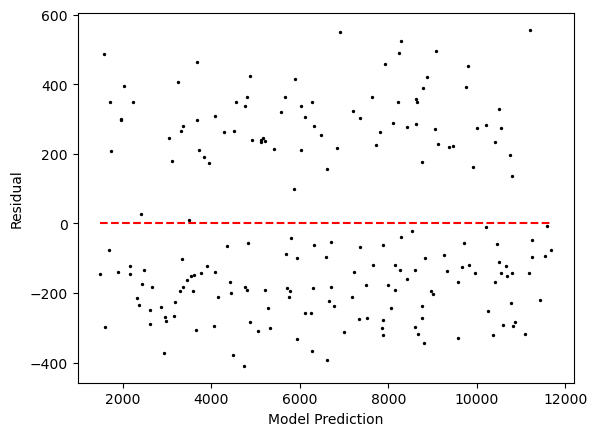

In [11]:
#Residuals calculated by definition above.
predicted_y = reg.predict(train_X)
#Note we can perform element-wise subtraction between arrays like so
residuals = train_y - predicted_y

import matplotlib.pyplot as plt
plt.scatter(predicted_y,residuals,s=2,c='black')

#This line adds the dashed horizontal line
plt.hlines(0,min(predicted_y),max(predicted_y),color='red',linestyles='dashed')

plt.xlabel("Model Prediction")
plt.ylabel("Residual")
plt.show()

Here, I see a gap above the 0 line. This means that the mean of our error terms is not zero. 

In [18]:
print('Mean of Residuals:',residuals.mean())

Mean of Residuals: -7.275957614183426e-14


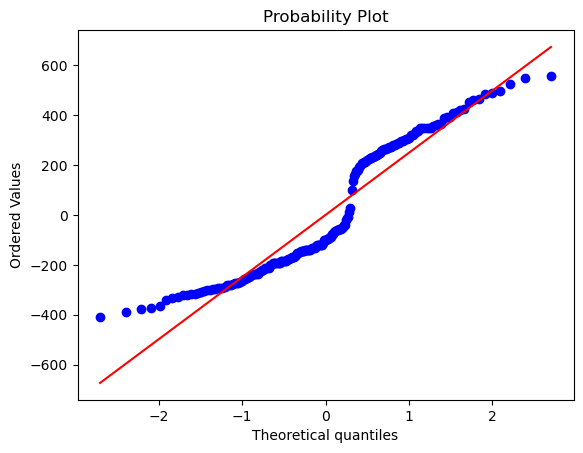

In [12]:
import scipy.stats as stats

'''
Boilerplate code for creating a Normal Q-Q plot. The first two lines declare 
a figure and a subplot. This is an alternate way to output plots which allows 
for more than one plot per output.
'''
fig = plt.figure()
ax = fig.add_subplot(111)

'''
Scipy.Stats has a built-in function for generating this type of plot. This 
function takes three arguments: the measurement being checked (residuals), 
the distribution we are checking against (normal in this case), and the plot 
to plot it to.
'''
stats.probplot(residuals,dist='norm',plot=ax)
plt.show()

Very not normal here. 

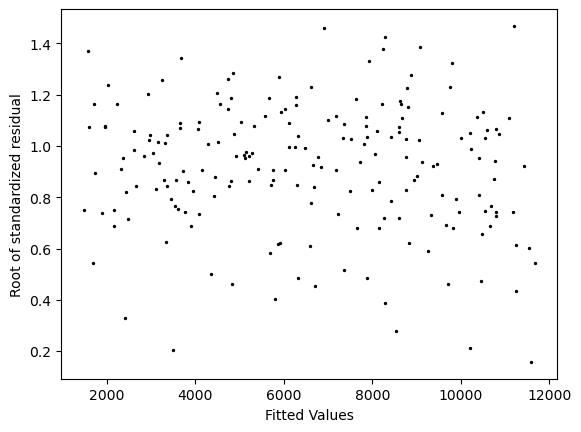

In [15]:
from sklearn.preprocessing import StandardScaler

# First we create an array of normalized residuals using a Scikit function
scaler = StandardScaler().fit(residuals.reshape(-1,1))
norm_residuals = scaler.transform(residuals.reshape(-1,1))

# Plot and take the root and absolute values of the norms
plt.scatter(predicted_y,np.sqrt(np.abs(norm_residuals)),c='black',s=2)
plt.xlabel("Fitted Values")
plt.ylabel("Root of standardized residual")
plt.show()

Don't see a problem here. 

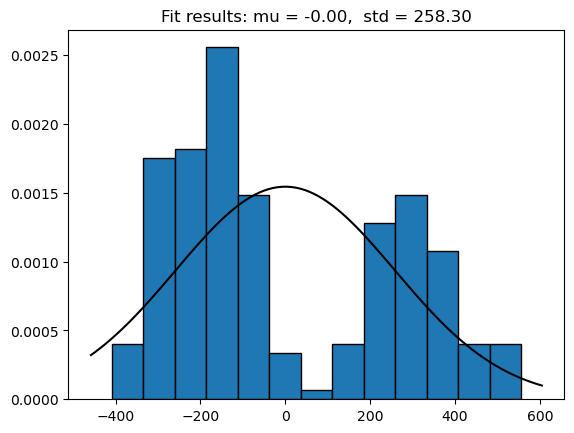

In [16]:
from scipy.stats import norm

# Fit a normal distribution to the data:
mean, std = norm.fit(residuals)

# Plot the histogram.
plt.hist(residuals, bins=13, edgecolor='black', density=True)

# Generate a PDF based on the fitted distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, color='black')
title = "Fit results: mu = %.2f,  std = %.2f" % (mean, std)
plt.title(title)

plt.show()

Here's the most obvious bit - bimodal error! 

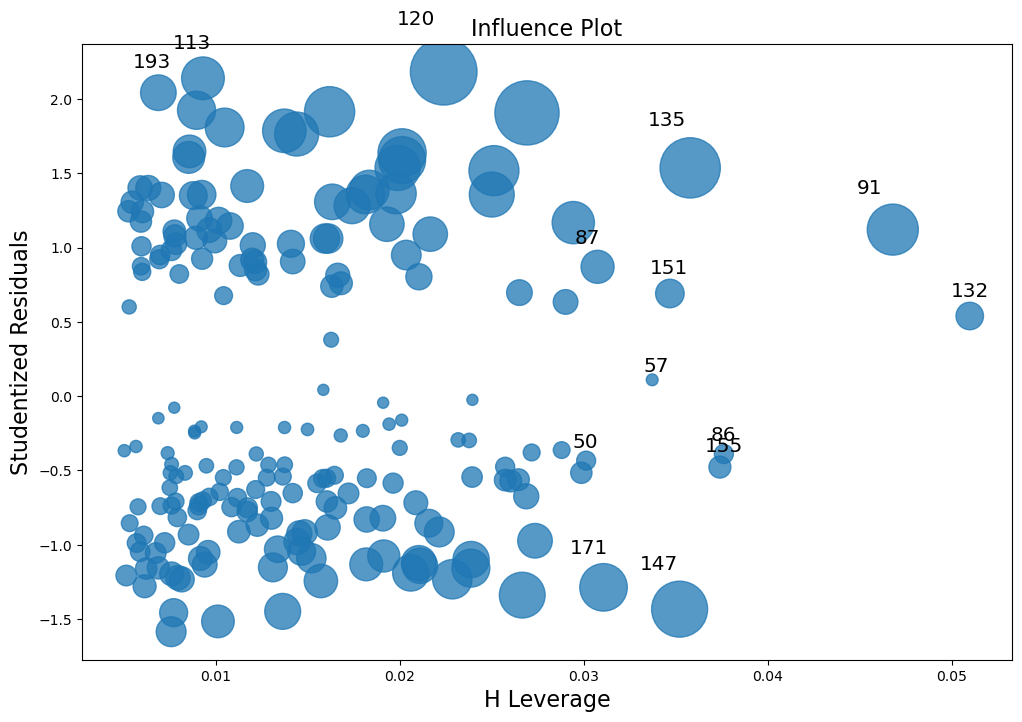

In [17]:
#In a similar fashion to how the QQ plot was built, this plot can be generated.
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, ax=ax, criterion="cooks")
plt.show()

Looks fine to me. 

## #3

In [22]:
data_path = osp.join(
    osp.curdir,'Data','MMA 860 Assessing and Testing Data File v1.0.xlsx')

#Use the read_excel function to pull data from the 'Sales Data' sheet
data2 = pd.read_excel(
    data_path,sheet_name='Bimodal Error 2',index_col='Obs')
data2.head()

,Y,X1,X2,US
Obs,,,,
1,2258,10,25,0
2,7542,62,27,0
3,4254,29,33,0
4,2355,7,58,0
5,8355,71,37,0


In [25]:
train_X2 = data2[['X1','X2','US']].values
train_y2 = data2['Y'].values


reg2 = LinearRegression().fit(train_X2, train_y2)

In [35]:
model2 = ols('Y ~ X1 + X2 + US',data2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.483e+04
Date:                Sat, 11 Mar 2023   Prob (F-statistic):          2.89e-286
Time:                        15:54:59   Log-Likelihood:                -1201.3
No. Observations:                 200   AIC:                             2411.
Df Residuals:                     196   BIC:                             2424.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1014.1135     31.820     31.870      0.0

Looks good to me. Slightly better than bimodal error 1!

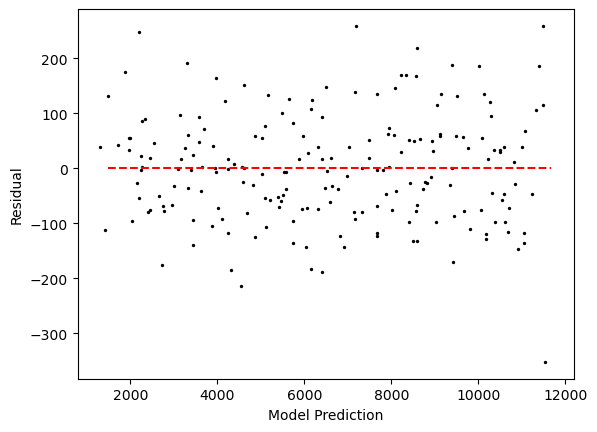

In [28]:
predicted_y2 = reg2.predict(train_X2)
residuals2 = train_y2 - predicted_y2

import matplotlib.pyplot as plt
plt.scatter(predicted_y2,residuals2,s=2,c='black')

#This line adds the dashed horizontal line
plt.hlines(0,min(predicted_y),max(predicted_y),color='red',linestyles='dashed')

plt.xlabel("Model Prediction")
plt.ylabel("Residual")
plt.show()

Looks good!

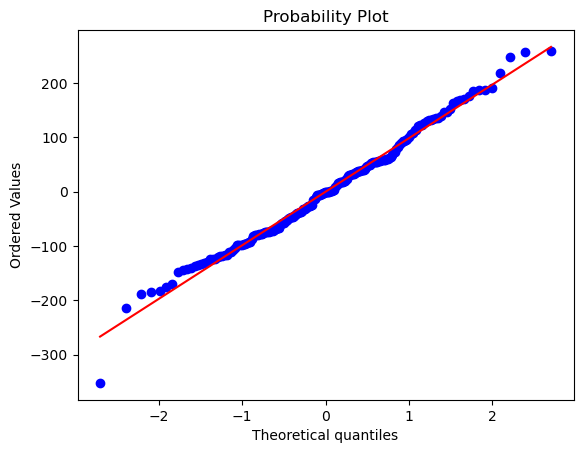

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

stats.probplot(residuals2,dist='norm',plot=ax)
plt.show()

Much better! 

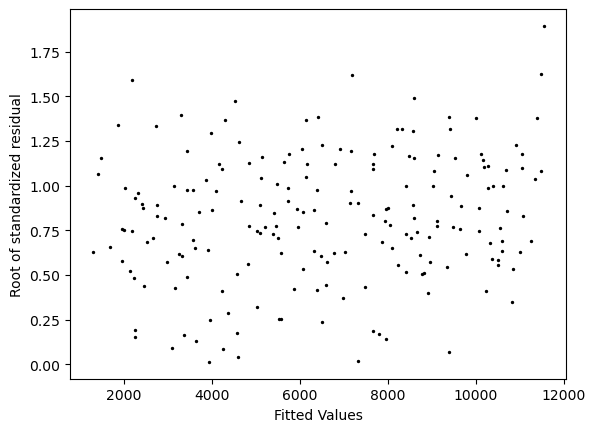

In [30]:

scaler = StandardScaler().fit(residuals2.reshape(-1,1))
norm_residuals = scaler.transform(residuals2.reshape(-1,1))

# Plot and take the root and absolute values of the norms
plt.scatter(predicted_y2,np.sqrt(np.abs(norm_residuals)),c='black',s=2)
plt.xlabel("Fitted Values")
plt.ylabel("Root of standardized residual")
plt.show()

Still all good.

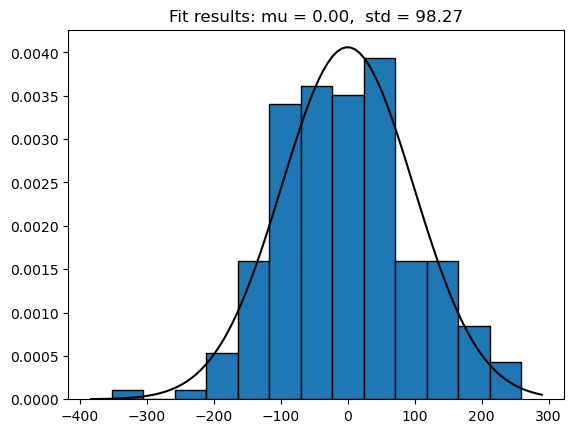

In [33]:


# Fit a normal distribution to the data:
mean, std = norm.fit(residuals2)

# Plot the histogram.
plt.hist(residuals2, bins=13, edgecolor='black', density=True)

# Generate a PDF based on the fitted distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, color='black')
title = "Fit results: mu = %.2f,  std = %.2f" % (mean, std)
plt.title(title)

plt.show()

So much better! 

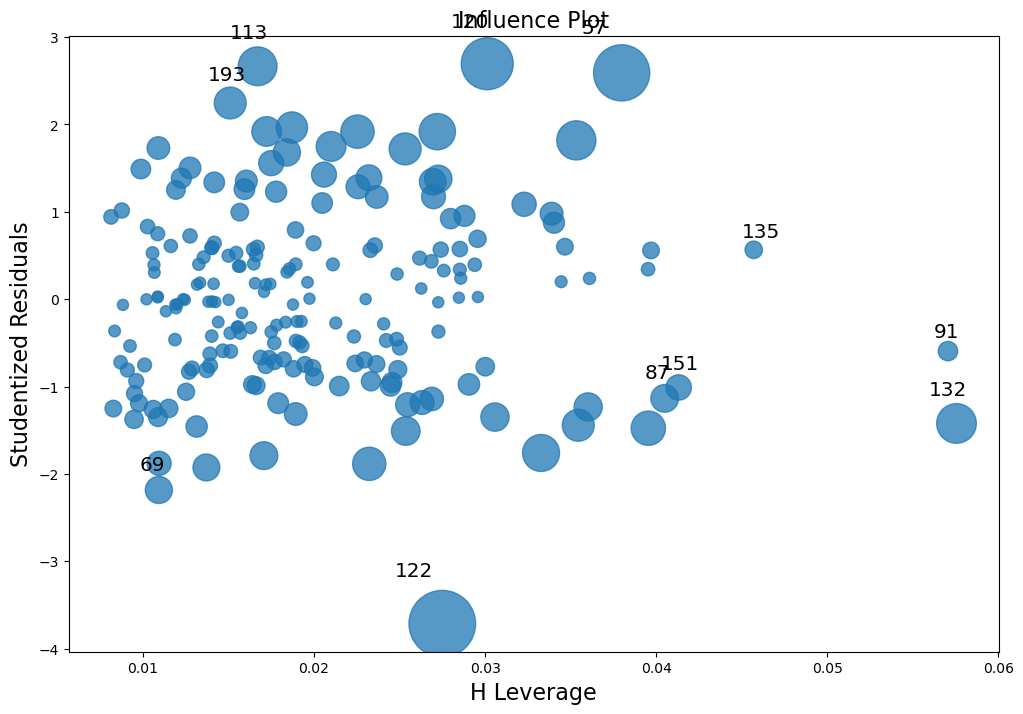

In [36]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model2, ax=ax, criterion="cooks")
plt.show()

Nothing too concerning. Maybe check out 122 if you're really worried.

## #4

In [38]:
data_path = osp.join(
    osp.curdir,'Data','MMA 860 Assessing and Testing Data File v1.0.xlsx')

#Use the read_excel function to pull data from the 'Sales Data' sheet
data3 = pd.read_excel(
    data_path,sheet_name='Nonlinear',index_col='Obs')
data3.head()

,Y,X1,X1Squared
Obs,,,
1,448.862636,6,36
2,560.644994,1,1
3,538.691453,1,1
4,379.603825,6,36
5,331.434588,7,49


In [43]:
train_X3 = data3[['X1']].values
train_y3 = data3['Y'].values


reg3 = LinearRegression().fit(train_X3, train_y3)

In [41]:
model3 = ols('Y ~ X1',data3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     288.3
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           2.73e-40
Time:                        15:59:09   Log-Likelihood:                -1148.3
No. Observations:                 197   AIC:                             2301.
Df Residuals:                     195   BIC:                             2307.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    622.1634     13.176     47.219      0.0

Looks good to me.

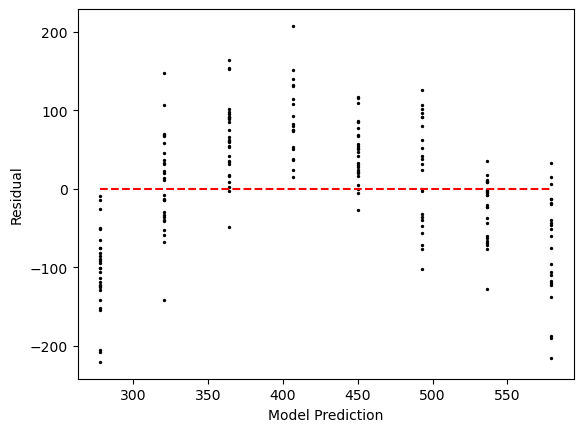

In [48]:
predicted_y3 = reg3.predict(train_X3)
residuals3 = train_y3 - predicted_y3

import matplotlib.pyplot as plt
plt.scatter(predicted_y3,residuals3,s=2,c='black')

#This line adds the dashed horizontal line
plt.hlines(0,min(predicted_y3),max(predicted_y3),color='red',linestyles='dashed')

plt.xlabel("Model Prediction")
plt.ylabel("Residual")
plt.show()

Here's a pretty obvious parabola pattern! 

In [52]:
train_X3_1 = data3[['X1', 'X1Squared']].values
train_y3 = data3['Y'].values


reg3_1 = LinearRegression().fit(train_X3_1, train_y3)

model3_1 = ols('Y ~ X1 + X1Squared',data3).fit()
print(model3_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     422.1
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           2.20e-71
Time:                        16:04:21   Log-Likelihood:                -1072.5
No. Observations:                 197   AIC:                             2151.
Df Residuals:                     194   BIC:                             2161.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    419.2591     16.245     25.808      0.0

Still looks good - even better.

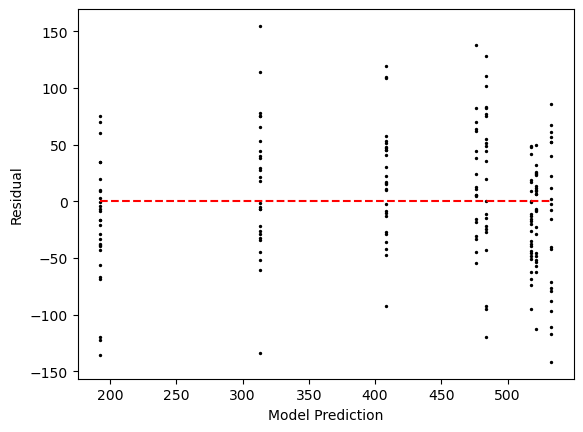

In [53]:
predicted_y3_1 = reg3_1.predict(train_X3_1)
residuals3_1 = train_y3 - predicted_y3_1

import matplotlib.pyplot as plt
plt.scatter(predicted_y3_1,residuals3_1,s=2,c='black')

#This line adds the dashed horizontal line
plt.hlines(0,min(predicted_y3_1),max(predicted_y3_1),color='red',linestyles='dashed')

plt.xlabel("Model Prediction")
plt.ylabel("Residual")
plt.show()

Much better - resolved! The reason you see straight lines is because X1 is an integer, so errors will always be a multiple of X1.

## #5

In [55]:
data_path = osp.join(
    osp.curdir,'Data','MMA 860 Assessing and Testing Data File v1.0.xlsx')

#Use the read_excel function to pull data from the 'Sales Data' sheet
data4 = pd.read_excel(
    data_path,sheet_name='Outliers',index_col='Obs')
data4.head()

,Y,X,Outlier
Obs,,,
1,70,3,2
2,103,7,4
3,143,7,4
4,113,8,3
5,117,3,2


In [56]:
train_X4 = data4[['X', 'Outlier']].values
train_y4 = data4['Y'].values


reg4 = LinearRegression().fit(train_X4, train_y4)

In [57]:
model4 = ols('Y ~ X + Outlier',data4).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     58.67
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           1.77e-17
Time:                        16:07:58   Log-Likelihood:                -432.04
No. Observations:                 101   AIC:                             870.1
Df Residuals:                      98   BIC:                             877.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     86.4067      4.088     21.139      0.0

There is an issue here - X isn't significant and probably doesn't belong in the model. Let's go on to the Cook's Distance plot anyway. 

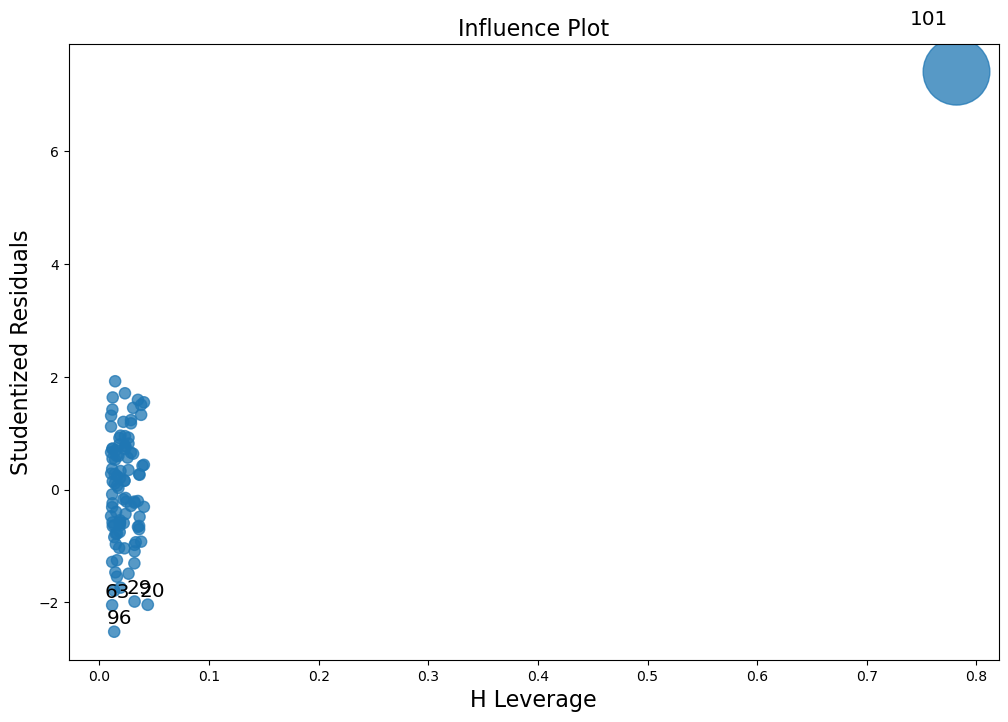

In [58]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model4, ax=ax, criterion="cooks")
plt.show()

Yep - there's an outlier in row 101. 

## #6

In [59]:
data5 = pd.read_excel(
    data_path,sheet_name='Heteroskedasticity',index_col='Obs')
data5.head()



,Y,X1,X2
Obs,,,
1,4084,38,22
2,4828,45,24
3,10304,98,21
4,5379,53,18
5,1670,14,27


In [62]:
train_X5 = data5[['X1', 'X2']].values
train_y5 = data5['Y'].values


reg5 = LinearRegression().fit(train_X5, train_y5)

model5 = ols('Y ~ X1 + X2',data5).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.532e+04
Date:                Sat, 11 Mar 2023   Prob (F-statistic):          8.06e-145
Time:                        16:11:11   Log-Likelihood:                -593.82
No. Observations:                 100   AIC:                             1194.
Df Residuals:                      97   BIC:                             1201.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     93.1518     62.684      1.486      0.1

Bit of an issue - X2 is right on the fringe of significance. 

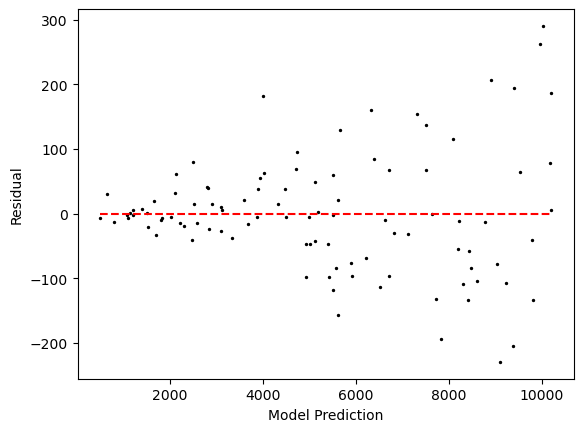

In [63]:
predicted_y5 = reg5.predict(train_X5)
residuals5 = train_y5 - predicted_y5

import matplotlib.pyplot as plt
plt.scatter(predicted_y5,residuals5,s=2,c='black')

#This line adds the dashed horizontal line
plt.hlines(0,min(predicted_y5),max(predicted_y5),color='red',linestyles='dashed')

plt.xlabel("Model Prediction")
plt.ylabel("Residual")
plt.show()

Here's some pretty obvious heteroskedasticity - notice the cone shaped pattern. 

## #7

In [65]:
data6 = pd.read_excel(
    data_path,sheet_name='Collinear',index_col='Obs')
data6.head()

,Y,Experience,Height,Weight
Obs,,,,
1,450,3,52,58
2,330,3,33,36
3,505,5,37,52
4,254,3,44,52
5,186,2,14,27


In [68]:
model6 = ols('Y ~ Experience + Height',data6).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     255.0
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           2.36e-39
Time:                        16:15:02   Log-Likelihood:                -540.07
No. Observations:                 100   AIC:                             1086.
Df Residuals:                      97   BIC:                             1094.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9241     16.868      0.055      0.9

Both experience and height look good

In [69]:
model6_1 = ols('Y ~ Experience + Weight',data6).fit()
print(model6_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     217.0
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           1.55e-36
Time:                        16:15:04   Log-Likelihood:                -546.75
No. Observations:                 100   AIC:                             1100.
Df Residuals:                      97   BIC:                             1107.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.4614     20.496     -0.510      0.6

Weight looks good too!

In [70]:
model6_2 = ols('Y ~ Experience + Height + Weight',data6).fit()
print(model6_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     168.3
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           4.27e-38
Time:                        16:15:22   Log-Likelihood:                -540.07
No. Observations:                 100   AIC:                             1088.
Df Residuals:                      96   BIC:                             1099.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5994     19.543      0.082      0.9

Now only height is significant! This is a classic example of collinearity, but one where the model was able to tease it apart.

## #8

In [71]:
data7 = pd.read_excel(
    data_path,sheet_name='Diminishing Returns',index_col='Obs')
data7.head()

,Sales,Price,Ad_Budget
Obs,,,
1,15590.994286,33,7266.240314
2,16257.210376,29,9482.567351
3,15343.437706,36,7657.476014
4,17945.365144,10,7672.249552
5,16341.674782,19,3795.892280


In [72]:
train_X7 = data7[['Price', 'Ad_Budget']].values
train_y7 = data7['Sales'].values


reg7 = LinearRegression().fit(train_X7, train_y7)

model7 = ols('Sales ~ Price + Ad_Budget',data7).fit()
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.437e+04
Date:                Sat, 11 Mar 2023   Prob (F-statistic):          2.32e-128
Time:                        16:18:20   Log-Likelihood:                -523.05
No. Observations:                  97   AIC:                             1052.
Df Residuals:                      94   BIC:                             1060.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.773e+04     25.622    692.010      0.0

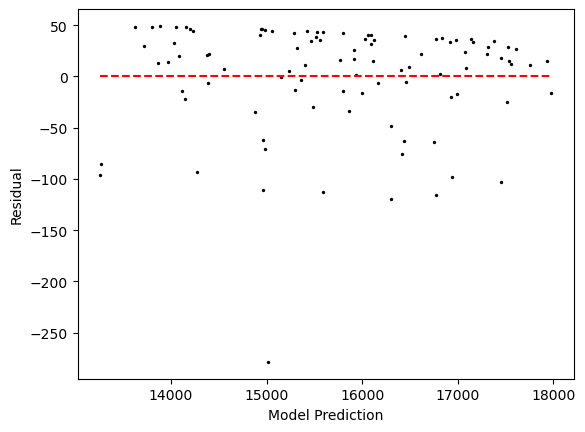

In [73]:
predicted_y7 = reg7.predict(train_X7)
residuals7 = train_y7 - predicted_y7

import matplotlib.pyplot as plt
plt.scatter(predicted_y7,residuals7,s=2,c='black')

#This line adds the dashed horizontal line
plt.hlines(0,min(predicted_y7),max(predicted_y7),color='red',linestyles='dashed')

plt.xlabel("Model Prediction")
plt.ylabel("Residual")
plt.show()

Definitely not great. Tightly clustered above 0, but spread out below 0. 

In [76]:
import math
data7['ln_adbudget'] = np.log2(data7['Ad_Budget'])

data7.head()

,Sales,Price,Ad_Budget,ln_adbudget
Obs,,,,
1,15590.994286,33,7266.240314,12.826993
2,16257.210376,29,9482.567351,13.211062
3,15343.437706,36,7657.476014,12.902653
4,17945.365144,10,7672.249552,12.905434
5,16341.674782,19,3795.892280,11.890223


In [78]:
train_X7_1 = data7[['Price', 'Ad_Budget', 'ln_adbudget']].values
train_y7_1 = data7['Sales'].values


reg7_1 = LinearRegression().fit(train_X7_1, train_y7_1)

model7_1 = ols('Sales ~ Price + Ad_Budget + ln_adbudget',data7).fit()
print(model7_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.796e+24
Date:                Sat, 11 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:25:51   Log-Likelihood:                 1786.9
No. Observations:                  97   AIC:                            -3566.
Df Residuals:                      93   BIC:                            -3556.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept        1e+04   3.65e-08   2.74e+11      

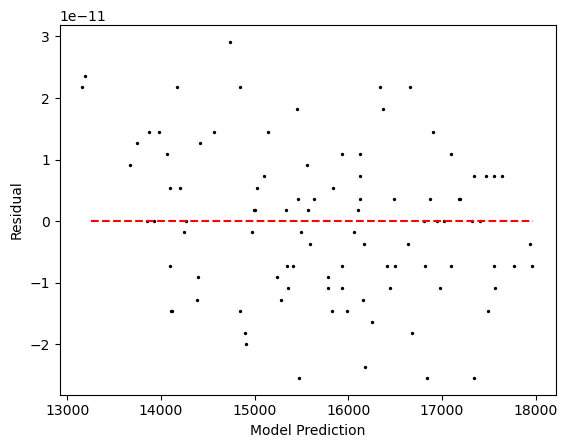

In [79]:
predicted_y7_1 = reg7_1.predict(train_X7_1)
residuals7_1 = train_y7_1 - predicted_y7_1

import matplotlib.pyplot as plt
plt.scatter(predicted_y7_1,residuals7_1,s=2,c='black')

#This line adds the dashed horizontal line
plt.hlines(0,min(predicted_y7),max(predicted_y7),color='red',linestyles='dashed')

plt.xlabel("Model Prediction")
plt.ylabel("Residual")
plt.show()

Much better!